In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [50]:
bank_additional = pd.read_csv('data/bank-additional/bank-additional-full.csv', sep=';')
bank = pd.read_csv('data/bank/bank-full.csv', sep=';')

In [31]:
bank_additional

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [32]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [33]:
bank_additional.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [34]:
[col for col in bank_additional.columns if col not in bank.columns]

['day_of_week',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [35]:
[col for col in bank.columns if col not in bank_additional.columns]

['balance', 'day']

In [36]:
bank.shape

(45211, 17)

In [37]:
bank_additional.shape

(41188, 21)

Dataset `bank_additional` has fewer datapoints and some cols that requires domain knowldage to understand. **We will choose `bank` in this project.**

or we can also load the dataset directly from library

In [38]:
# from ucimlrepo import fetch_ucirepo 
  
# # fetch dataset 
# bank_marketing = fetch_ucirepo(id=222) 
  
# # data (as pandas dataframes) 
# X = bank_marketing.data.features 
# y = bank_marketing.data.targets 
  
# # metadata 
# print(bank_marketing.metadata) 
  
# # variable information 
# print(bank_marketing.variables) 

In [40]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [41]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [46]:
bank.y.value_counts()/len(bank)

y
no    0.883
yes   0.117
Name: count, dtype: float64

Pay attention that the target is **class-imbalanced**

# global config

In [47]:
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:.3f}'.format
random_state = 522

# train test split

In [52]:
bank_train, bank_test = train_test_split(bank
                                        , test_size=0.2
                                        , random_state=random_state
                                        , stratify=bank.y
                                        )

In [53]:
bank_train.y.value_counts()/len(bank_train)

y
no    0.883
yes   0.117
Name: count, dtype: float64

Via stratified split, we managed to keep the distribtuion of the label in the original dataset.

# EDA

In [59]:
for i in list(bank_train.columns):
    print(f"{i:<10}->  {bank_train[i].nunique():<5} unique values")

age       ->  77    unique values
job       ->  12    unique values
marital   ->  3     unique values
education ->  4     unique values
default   ->  2     unique values
balance   ->  6601  unique values
housing   ->  2     unique values
loan      ->  2     unique values
contact   ->  3     unique values
day       ->  31    unique values
month     ->  12    unique values
duration  ->  1506  unique values
campaign  ->  47    unique values
pdays     ->  536   unique values
previous  ->  40    unique values
poutcome  ->  4     unique values
y         ->  2     unique values


In [61]:
bank_int = list(bank_train.select_dtypes(include = ['int64']).columns)
bank_str = list(bank_train.select_dtypes(include = ['object']).columns)
# bank_str.remove("y")
bank_categorical = bank_str+['day']

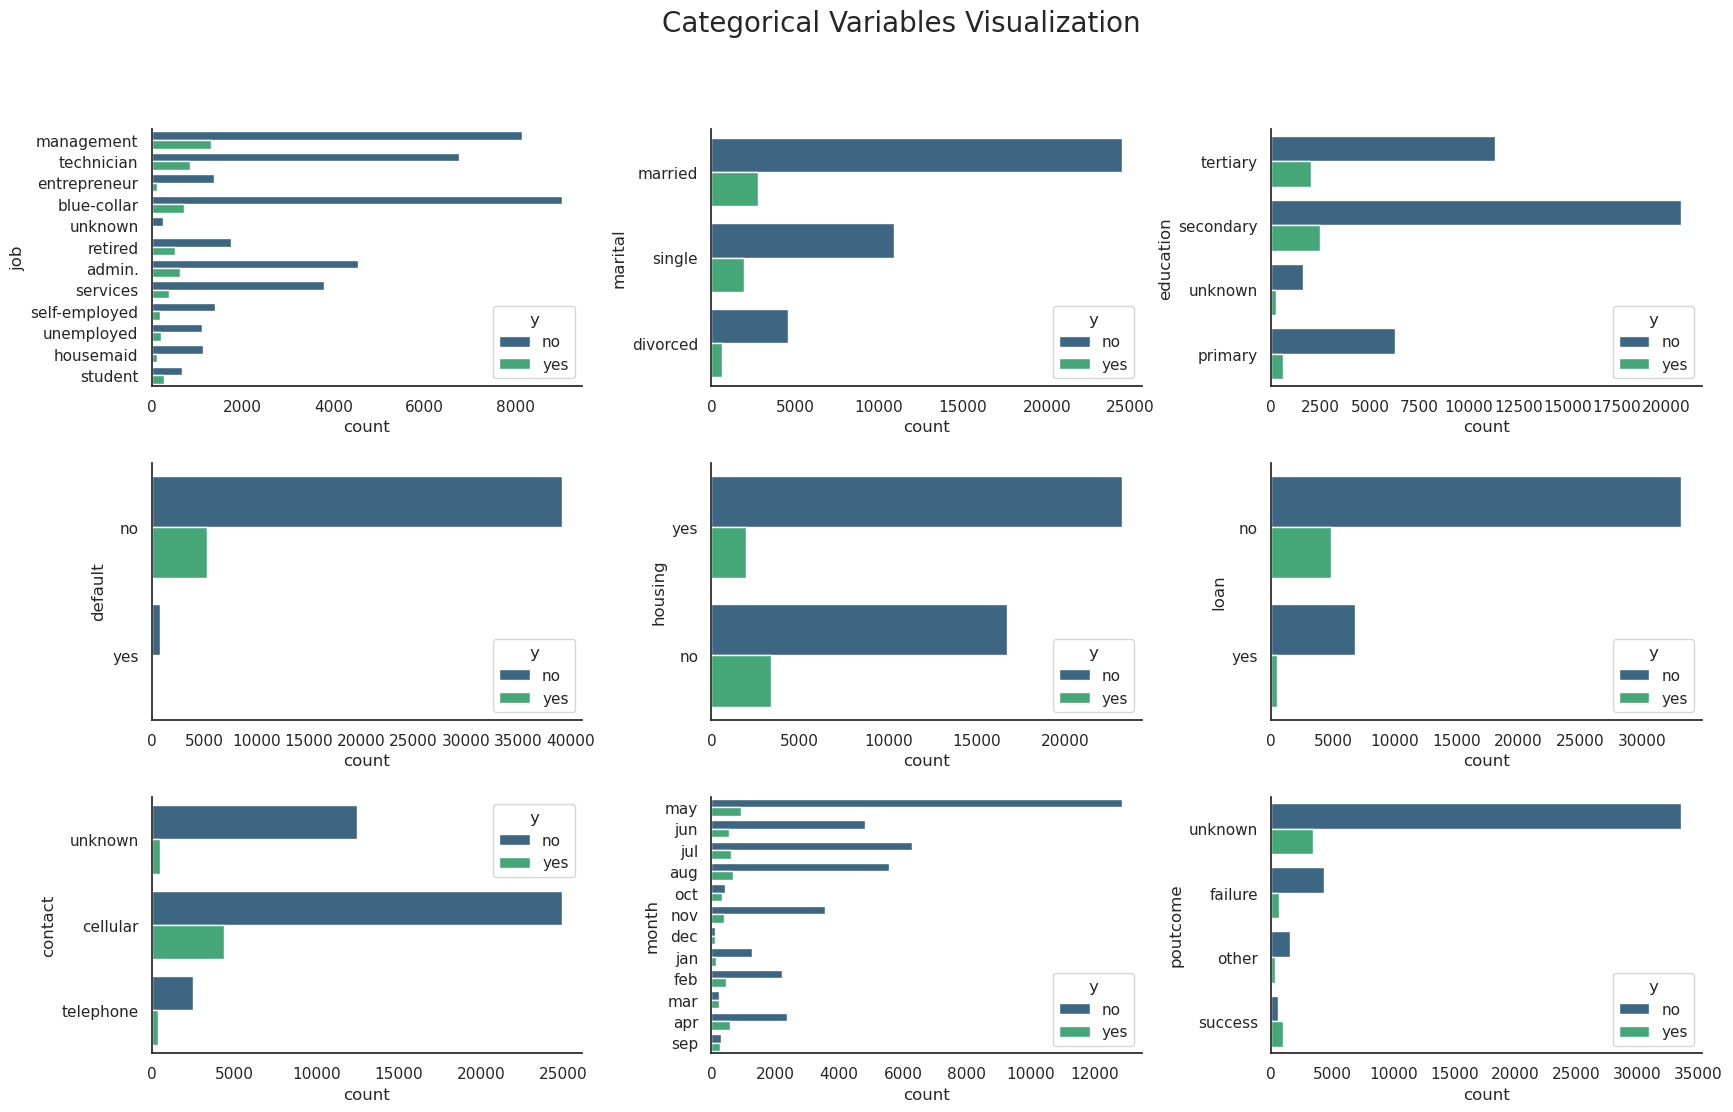

In [62]:
fig, axes = plt.subplots(3, 3, figsize=(20, 12))
plt.suptitle('Categorical Variables Visualization', fontsize=20)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.3)
for i, ax in enumerate(axes.ravel()):
    if i > 9:
        ax.set_visible(False)
        continue
    sns.set_theme(style="white")
    sns.countplot(y = bank_str[i], data = bank_train, hue='y', ax = ax, palette="viridis")    
    sns.despine()
    
plt.show()

Continuous Variables Visualization


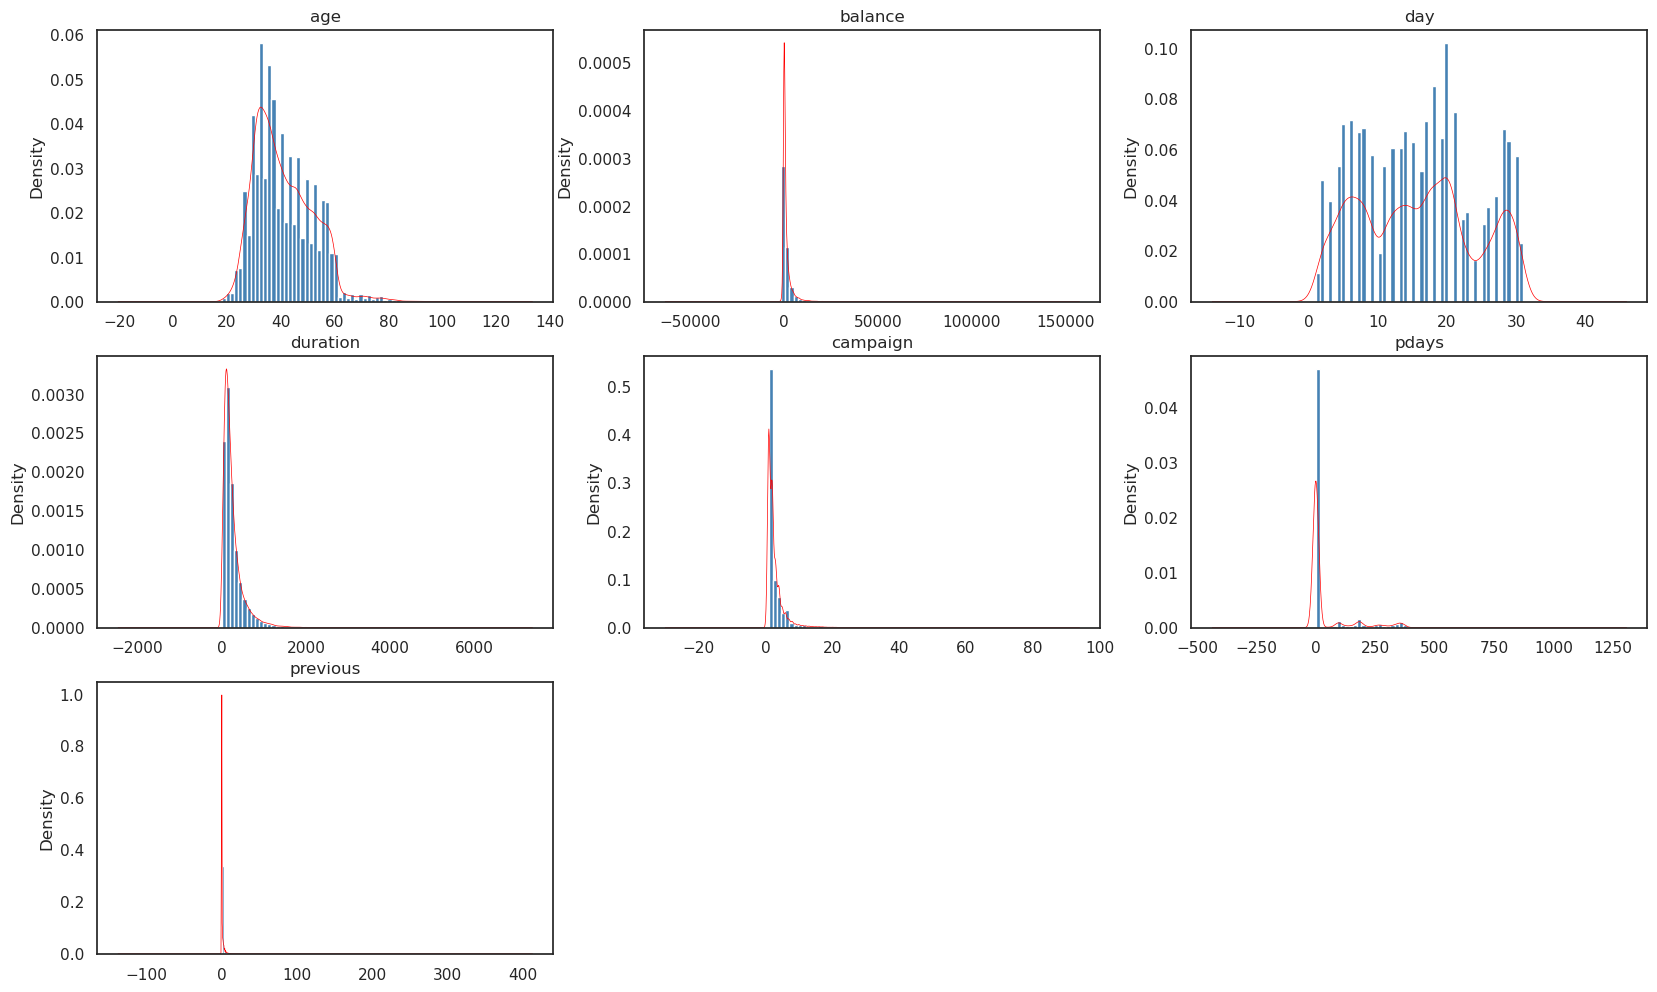

In [64]:
print("Continuous Variables Visualization")
fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (20,12))
for i, item in enumerate(bank_int):
    if i < 3:
#         ax = sns.displot(bank[item], bins=100, hist=True, kde=True)
        ax = bank_train[item].plot(kind = 'hist', ax=axes[0,i], bins=50, density=True, color='steelblue')
        ax = bank_train[item].plot(kind = 'kde', ax=axes[0,i], color = 'red', linewidth=0.5)
    elif i >=3 and i < 6:
        ax = bank_train[item].plot(kind = 'hist', ax=axes[1,i-3], bins=50, density=True, color='steelblue')
        ax = bank_train[item].plot(kind = 'kde', ax=axes[1,i-3], color = 'red', linewidth=0.5)
    elif i < 9:
        ax = bank_train[item].plot(kind = 'hist', ax=axes[2,i-6], bins=100, density=True, color='steelblue')
        ax = bank_train[item].plot(kind = 'kde', ax=axes[2,i-6], color = 'red', linewidth=0.5)
        
    ax.set_title(item)
plt.delaxes(axes[2, 1])
plt.delaxes(axes[2, 2])

After log transformation


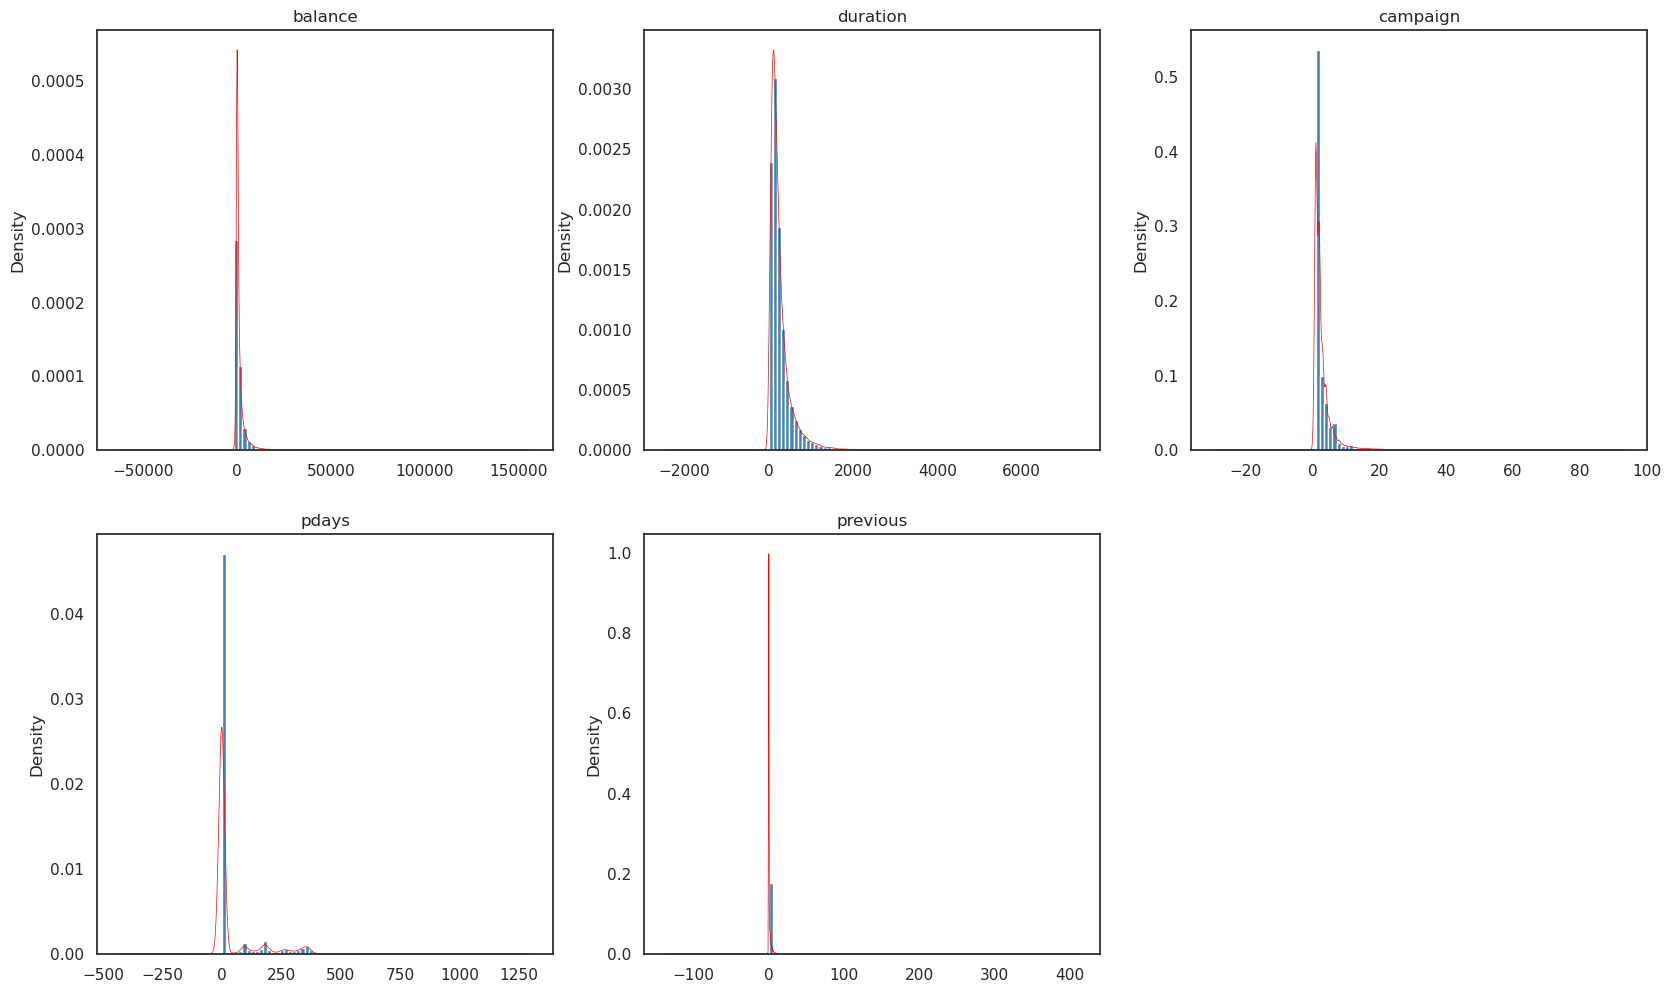

In [65]:
bank_log = ['balance', 'duration', 'campaign', 'pdays', 'previous']
print("After log transformation")
fig, axes = plt.subplots(nrows = 2,ncols = 3,figsize = (20,12))
for i, item in enumerate(bank_log):
    if i < 3:
#         ax = sns.displot(bank[item], bins=100, hist=True, kde=True)
        ax = bank_train[item].plot(kind = 'hist', ax=axes[0,i], bins=50, density=True, color='steelblue')
        ax = bank_train[item].plot(kind = 'kde', ax=axes[0,i], color = 'red', linewidth=0.5)
    elif i >=3 and i < 6:
        ax = bank_train[item].plot(kind = 'hist', ax=axes[1,i-3], bins=50, density=True, color='steelblue')
        ax = bank_train[item].plot(kind = 'kde', ax=axes[1,i-3], color = 'red', linewidth=0.5)
    elif i < 9:
        ax = bank_train[item].plot(kind = 'hist', ax=axes[2,i-6], bins=100, density=True, color='steelblue')
        ax = bank_train[item].plot(kind = 'kde', ax=axes[2,i-6], color = 'red', linewidth=0.5)
        
    ax.set_title(item)
plt.delaxes(axes[1, 2])